## TRABAJO No. 1
# PERFILES DE BRILLO Y VELOCIDAD DE GALAXIAS

El objetivo de este trabajo es ganar confianza en la manipulación de matrices y análisis de datos
utilizando Python y Numpy, a través de un ejercicio real de investigación relacionado con
la distribución de masa en galaxias espirales.

### 1. Adquisición de los datos
Para cada galaxia a estudiar hay que descargar de la página del instrumento Fabry-Perot del 
Laboratoire d'Astrophysique de Marseille los archivos .fits con la imagen y el mapa de velocidades.
La imagen es el archivo llamado xdss. En cuanto a los mapas de velocidad, hay 2 versiones. El que se llama sólamente
_velocity field_ lo usaremos para visualizaciones, mientras que el llamado _velocity field bin_
será el que realmente usemos para los análisis.  

[Fabry-Perot LAM](http://cesam.lam.fr/fabryperot/search/criteria)

In [5]:
# Importamos las biblioteccas necesarias
import astropy.io.fits as fits 
import numpy as np
import matplotlib.pyplot as plt

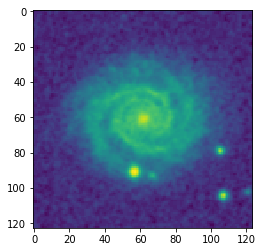

In [6]:
# Leer y visualizar los datos de brillo superficial
hdu = fits.open("ugc4555_dss.fits")
flux = hdu[0].data
plt.imshow(np.log10(flux),interpolation=None)
# Para ver las informaciones en el header que acompaña a los datos
# header = hdu[0].header

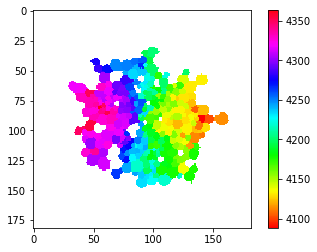

In [8]:
# Equivalentemente con el mapa de velocidad
hdu = fits.open("ugc4555_mascarada.fits")
velmap = hdu[0].data
plt.imshow(velmap,cmap="hsv",interpolation=None)
plt.colorbar()

### 2. Deproyección de los mapas
Como se explicó en clase, las galaxias tipo disco son circulares en primera aproximación,
y solo aparecen como elipses en el plano del cielo por que están inclinadas.
Por esto, las coordenadas polares $(R,\psi)$ de un pixel en la geometría proyectada, corresponden
en realidad a una pareja de coordenadas diferente $(r,\theta)$ en el disco galáctico.
Este último radio, $r$, es el verdadero radio físico en el disco, y es el que necesitamos para construir los perfiles de brillo y velocidad.

\begin{eqnarray}
tan(\theta) & = & R\frac{tan(\psi)}{\cos(i)} \nonumber \\
\alpha & = & \sqrt{\cos(\psi)^2 + \frac{\sin(\psi)^2}{\cos(i)^2}} \nonumber \\
r & = & \alpha R \nonumber
\end{eqnarray}

Además es indispensable transformar cada velocidad medida por efecto Doppler a lo largo de la línea de visión, $V_{los}$ , en la correspondiente velocidad de rotación. Asumiendo que el disco
está en rotación pura:


\begin{eqnarray}
Vcirc(r) & = & (V_{los}(R) - V_{sys})\frac{\alpha}{\sin(i)\cos(\psi - \psi_0)} \nonumber
\end{eqnarray}

En la última ecuación el término $\psi - \psi_0$ está para recordarle que los ángulos se miden
respecto al semieje mayor de la galaxia, que no siempre está alineado horizontalmente.  

### 3. Creación de los perfiles unidimensionales